# Capstone Part 2: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
got = pd.read_csv('got.csv')

In [3]:
got.head()

,seas_ep,seas,ep,ep_ct,ep_title,character,wordcount,duration,release,writer_1,writer_2,director,US_viewers,imdb,rt,rt_aud
0,S1E1,1,1,1,Winter Is Coming,Will,2,62,4/17/2011,David Benioff,D.B. Weiss,Timothy Van Patten,2.22,9.1,100,96
1,S1E2,1,2,2,The Kingsroad,Jorah Mormont,7,56,4/24/2011,David Benioff,D.B. Weiss,Timothy Van Patten,2.20,8.8,100,96
2,S1E3,1,3,3,Lord Snow,Royal Steward,21,58,5/1/2011,David Benioff,D.B. Weiss,Brian Kirk,2.44,8.7,86,96
3,S1E4,1,4,4,"Cripples, Bastards, and Broken Things",Old Nan,6,56,5/8/2011,David Benioff,D.B. Weiss,Brian Kirk,2.45,8.8,100,96
4,S1E5,1,5,5,The Wolf and the Lion,Eddard Stark,9,55,5/15/2011,David Benioff,D.B. Weiss,Brian Kirk,2.58,9.1,95,96


In [4]:
got.describe()

,seas,ep,ep_ct,wordcount,duration,US_viewers,imdb,rt,rt_aud
count,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000
mean,3.993211,5.101574,34.813866,12.835589,57.586660,6.199919,8.848029,92.600110,89.081124
std,2.167589,2.750693,21.025881,16.420386,6.803552,2.783498,0.871457,11.042168,17.179794
min,1.000000,1.000000,1.000000,1.000000,50.000000,2.200000,4.100000,48.000000,30.000000
25%,2.000000,3.000000,17.000000,4.000000,53.000000,3.860000,8.700000,89.000000,90.000000
50%,4.000000,5.000000,33.000000,8.000000,56.000000,6.310000,8.900000,96.000000,96.000000
75%,6.000000,7.000000,53.000000,16.000000,59.000000,7.660000,9.200000,100.000000,97.000000
max,8.000000,10.000000,73.000000,389.000000,82.000000,13.610000,9.900000,100.000000,97.000000


In [5]:
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23569 entries, 0 to 23568
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   seas_ep     23569 non-null  object 
 1   seas        23569 non-null  int64  
 2   ep          23569 non-null  int64  
 3   ep_ct       23569 non-null  int64  
 4   ep_title    23569 non-null  object 
 5   character   23569 non-null  object 
 6   wordcount   23569 non-null  int64  
 7   duration    23569 non-null  int64  
 8   release     23569 non-null  object 
 9   writer_1    23569 non-null  object 
 10  writer_2    23569 non-null  object 
 11  director    23569 non-null  object 
 12  US_viewers  23569 non-null  float64
 13  imdb        23569 non-null  float64
 14  rt          23569 non-null  int64  
 15  rt_aud      23569 non-null  int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 2.9+ MB


In [6]:
got[got.wordcount == got.wordcount.max()]

#Note that this is the maximum wordcount for a single instance/line, not the entire episode

,seas_ep,seas,ep,ep_ct,ep_title,character,wordcount,duration,release,writer_1,writer_2,director,US_viewers,imdb,rt,rt_aud
9406,S7E3,7,3,63,The Queen's Justice,Cersei Lannister,389,63,7/30/2017,George R.R. Martin,David Benioff,Mark Mylod,9.25,9.2,89,82


<AxesSubplot:>

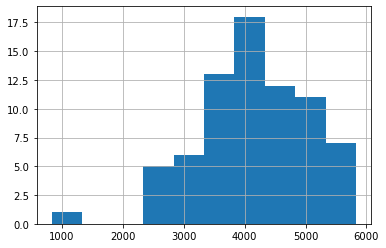

In [7]:
#histogram of word count per episodeb

got.wordcount.groupby(got.ep_ct).sum().hist()

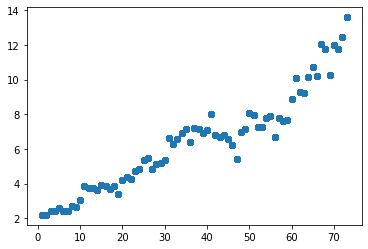

In [8]:
#US viewership over time

plt.scatter(got.ep_ct, got.US_viewers)

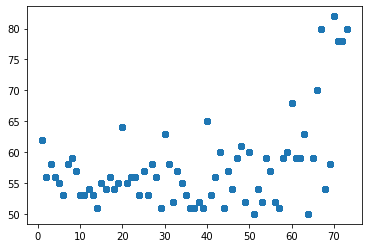

In [9]:
# episode duration gets higher and more variable over time

plt.scatter(got.ep_ct, got.duration)

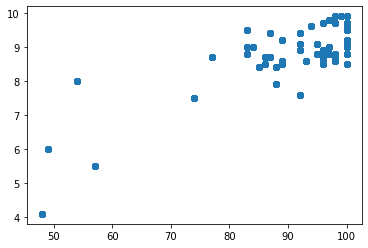

In [10]:
# relationship between rottentomatoes critical score and IMDB critical score
plt.scatter(got.rt, got.imdb)


In [11]:
ep_char_df = pd.DataFrame(got.groupby(['ep_ct', 'character']).wordcount.sum())
ep_char_df

wordcount
ep_ct character                  
1     Arya Stark               15
      Benjen Stark            149
      Bran Stark               61
      Catelyn Stark           400
      Cersei Lannister        140
...                           ...
73    Stark Bannermen          25
      Tyrion Lannister       1268
      Unsullied #1              5
      Yara Greyjoy             53
      Yohn Royce               23

[3143 rows x 1 columns]

In [12]:
got.groupby(['ep_ct', 'character']).wordcount.sum()

ep_ct  character       
1      Arya Stark            15
       Benjen Stark         149
       Bran Stark            61
       Catelyn Stark        400
       Cersei Lannister     140
                           ... 
73     Stark Bannermen       25
       Tyrion Lannister    1268
       Unsullied #1           5
       Yara Greyjoy          53
       Yohn Royce            23
Name: wordcount, Length: 3143, dtype: int64

In [13]:
# 25 largest speaking parts

got.groupby('character').wordcount.sum().nlargest(25)

character
Tyrion Lannister      27655
Cersei Lannister      15234
Jon Snow              12592
Daenerys Targaryen    12560
Jaime Lannister       11728
Sansa Stark            8937
Petyr Baelish          8408
Lord Varys             7421
Samwell Tarly          6727
Davos Seaworth         6726
Arya Stark             6465
Tywin Lannister        5964
Theon Greyjoy          5363
Jorah Mormont          4806
Bronn                  4709
Brienne of Tarth       4049
Sandor Clegane         3947
Olenna Tyrell          3924
Robb Stark             3920
Stannis Baratheon      3607
Margaery Tyrell        3534
Eddard Stark           3511
Catelyn Stark          3496
Melisandre             3329
Ramsay Snow            3329
Name: wordcount, dtype: int64

In [16]:
tot_wordcount = got.wordcount.sum()
top_25_wordcount = got.groupby('character').wordcount.sum().nlargest(25).sum()
print('25 largest roles as percent of total wordcount:', int(top_25_wordcount) / int(tot_wordcount))

25 largest roles as percent of total wordcount: 0.6014141120315216


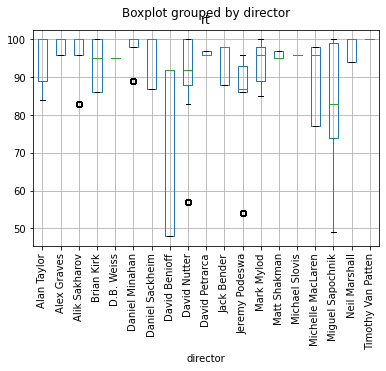

In [44]:
got.boxplot(by='director', column=['rt'])

plt.xticks(rotation='vertical');

<AxesSubplot:title={'center':'rt'}, xlabel='writer_1'>

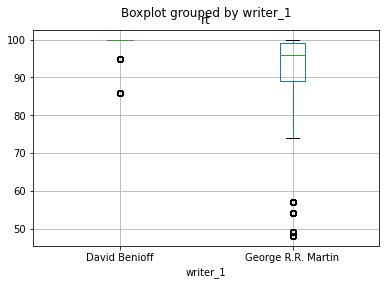

In [48]:
got.boxplot(by='writer_1', column=['rt'])

<AxesSubplot:title={'center':'rt'}, xlabel='writer_2'>

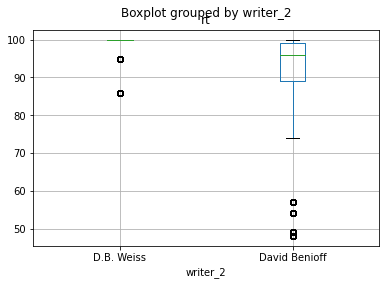

In [49]:
got.boxplot(by='writer_2', column=['rt'])

## Results

The dataset is very usable but I haven't seen any clear relationships yet. My next steps are to start building a model that checks to see if particular characters influence ratings or critical scores.

If I don't see anything interesting there, I may switch to a larger dataset of rottentomatoes/IMDB scores and compare them to lag ratings, to see if there's a correlation between critical reaction to an episode of television, and the ratings of the next episode.

## Update:

After completing EDA, we determined that finding a ratings relationship was infeasible, so we switched to an NLP analysis. Our problem statement is to see if we can determine a character's social class based on their vocabulary. We will also be identifying wordprint similarities between characters.